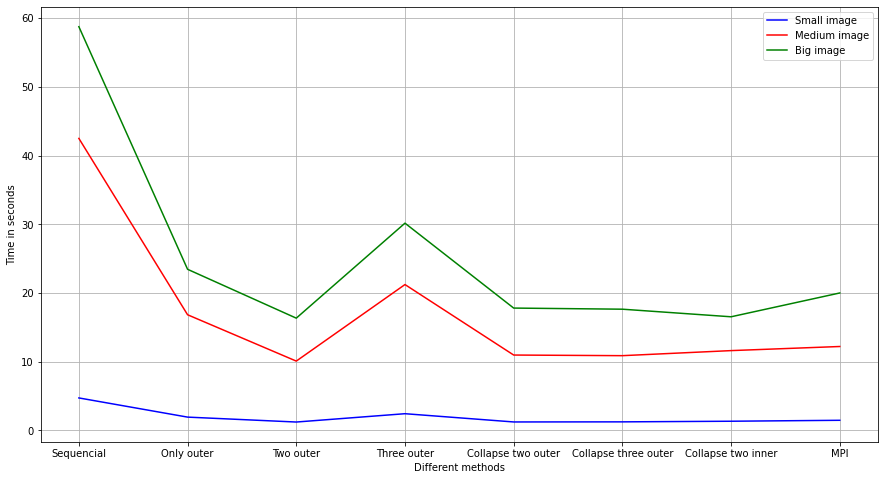

In [61]:
from matplotlib import pyplot as plt
import numpy as np

#General analysis

x_label=['Sequencial', 'Only outer', 'Two outer', 'Three outer', 'Collapse two outer', 'Collapse three outer', 'Collapse two inner', 'MPI']

small = [4.728, 1.936, 1.22, 2.432, 1.231, 1.245, 1.337, 1.474]
medium = [42.504, 16.835, 10.09, 21.231, 10.971, 10.88, 11.616, 12.214]
big = [58.765, 23.453, 16.34, 30.167, 17.807, 17.644, 16.539, 20.006]

plt.figure(figsize=(15,8))
plt.plot(x_label, small, color='blue')
plt.plot(x_label, medium, color='red')
plt.plot(x_label, big, color='green')
plt.xlabel("Different methods")
plt.ylabel("Time in seconds")
plt.grid()
plt.legend(["Small image", "Medium image", "Big image"], loc='upper right')
plt.show()

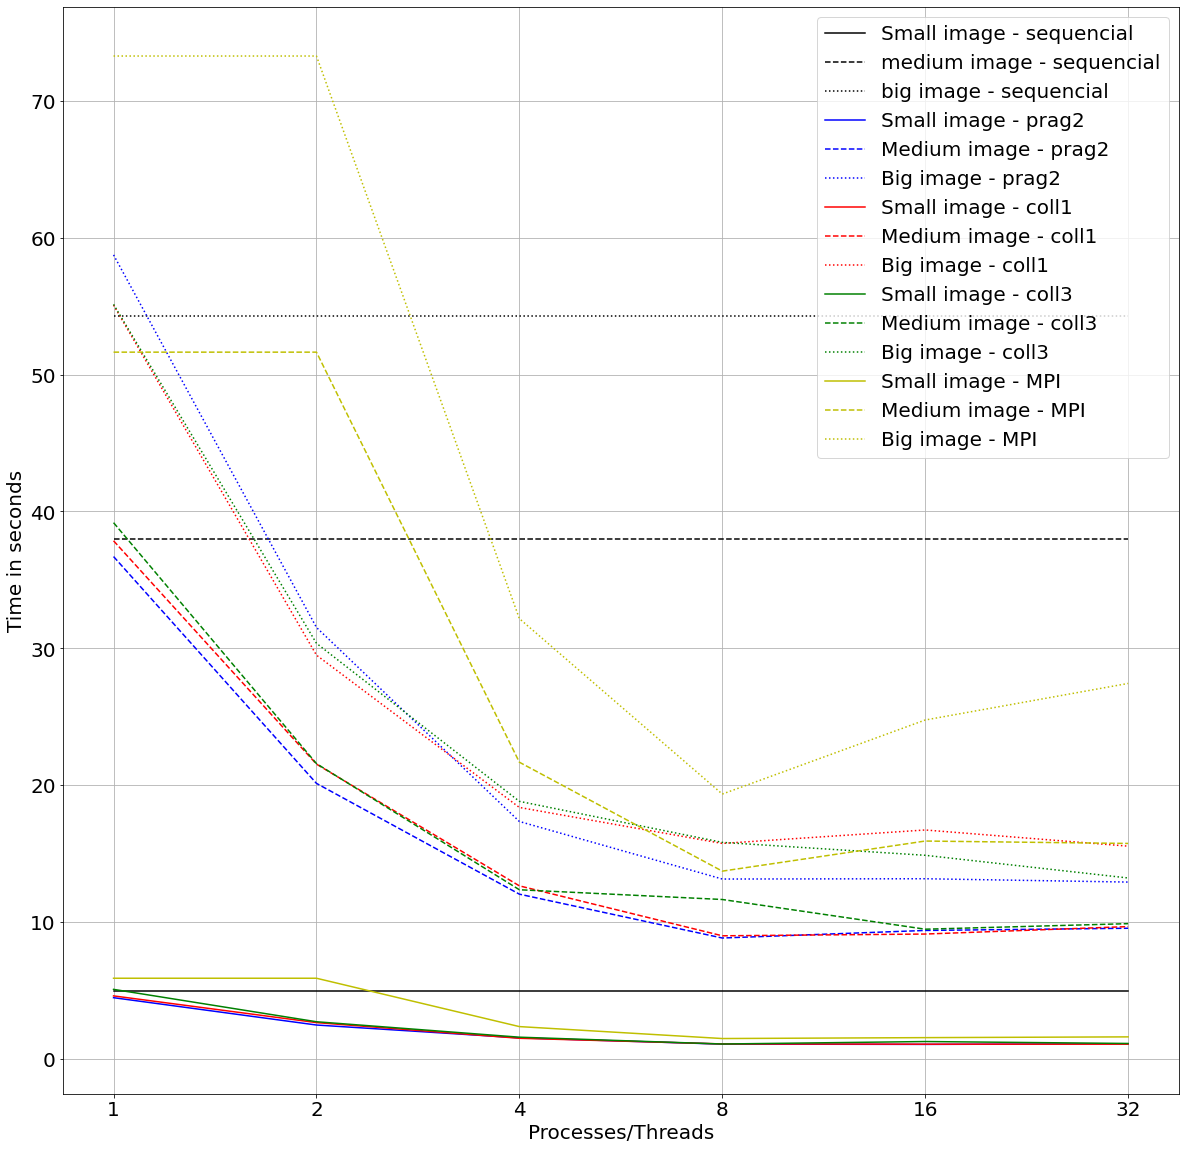

In [99]:
#Cores analysis for the fastest ones
#Seq vs Pragma2 vs Collapse1 vs Collapse3 vs MPI

x_label = ['1', '2', '4', '8', '16', '32']

seq_small = [5.006, 5.006, 5.006, 5.006, 5.006, 5.006]
seq_medium = [37.997, 37.997, 37.997, 37.997, 37.997, 37.997] 
seq_big = [54.286, 54.286, 54.286, 54.286, 54.286, 54.286]

small_Prag2 = [4.495, 2.499, 1.561, 1.104, 1.085, 1.124]
medium_Prag2 = [36.706, 20.144, 12.054, 8.852, 9.405, 9.565]
big_Prag2 = [58.735, 31.53, 17.361, 13.159, 13.18, 12.937]

small_coll1 = [4.626, 2.675, 1.53, 1.118, 1.099, 1.101]
medium_coll1 = [37.857, 21.55, 12.661, 9.014, 9.142, 9.686]
big_coll1 = [55.068, 29.507, 18.386, 15.758, 16.741, 15.56]

small_coll3 = [5.102, 2.738, 1.611, 1.112, 1.293, 1.152]
medium_coll3 = [39.18, 21.588, 12.376, 11.665, 9.496, 9.9]
big_coll3 = [55.123, 30.373, 18.831, 15.836, 14.892, 13.236]

small_mpi = [5.915, 5.915, 2.384, 1.512, 1.578, 1.633]
medium_mpi = [51.633, 51.633, 21.69, 13.735, 15.933, 15.758]
big_mpi = [73.257, 73.257, 32.175, 19.363, 24.771, 27.441]

"""plt.figure(figsize=(30,20))
fig, axs = plt.subplots(2,2)
axs[0,0].plot(x_label, seq_small, color='black')
axs[0,0].plot(x_label, small_Prag2, color='blue')
axs[0,0].plot(x_label, small_coll1, color='red')
axs[0,0].plot(x_label, small_coll3, color='green')
axs[0,0].plot(x_label, small_mpi, color='yellow')
axs[0,0].set_title('Small png')

axs[0,1].plot(x_label, seq_medium, color='black')
axs[0,1].plot(x_label, medium_Prag2, color='blue')
axs[0,1].plot(x_label, medium_coll1, color='red')
axs[0,1].plot(x_label, medium_coll3, color='green')
axs[0,1].plot(x_label, medium_mpi, color='yellow')
axs[0,1].set_title('Medium png')

axs[1,0].plot(x_label, seq_big, color='black')
axs[1,0].plot(x_label, big_Prag2, color='blue')
axs[1,0].plot(x_label, big_coll1, color='red')
axs[1,0].plot(x_label, big_coll3, color='green')
axs[1,0].plot(x_label, big_mpi, color='yellow')
axs[1,0].set_title('Big png')

plt.show()"""

plt.rcParams['font.size'] = '20'
plt.figure(figsize=(20,20))
plt.plot(x_label, seq_small, 'k-', label='Small image - sequencial')
plt.plot(x_label, seq_medium, 'k--', label='Medium image - sequencial')
plt.plot(x_label, seq_big, 'k:', label='Big image - sequencial')
plt.plot(x_label, small_Prag2, 'b-', label='Small image - prag2')
plt.plot(x_label, medium_Prag2, 'b--', label='Medium image - prag2')
plt.plot(x_label, big_Prag2, 'b:', label='Big image - prag2')
plt.plot(x_label, small_coll1, 'r-', label='Small image - coll1')
plt.plot(x_label, medium_coll1, 'r--', label='Medium image - coll1')
plt.plot(x_label, big_coll1, 'r:', label='Big image - coll1')
plt.plot(x_label, small_coll3, 'g-', label='Small image - coll3')
plt.plot(x_label, medium_coll3, 'g--', label='Medium image - coll3')
plt.plot(x_label, big_coll3, 'g:', label='Big image - coll3')
plt.plot(x_label, small_mpi, 'y-', label='Small image - MPI')
plt.plot(x_label, medium_mpi, 'y--', label='Medium image - MPI')
plt.plot(x_label, big_mpi, 'y:', label='Big image - MPI')
plt.xlabel("Processes/Threads")
plt.ylabel("Time in seconds")
plt.grid()
plt.legend()

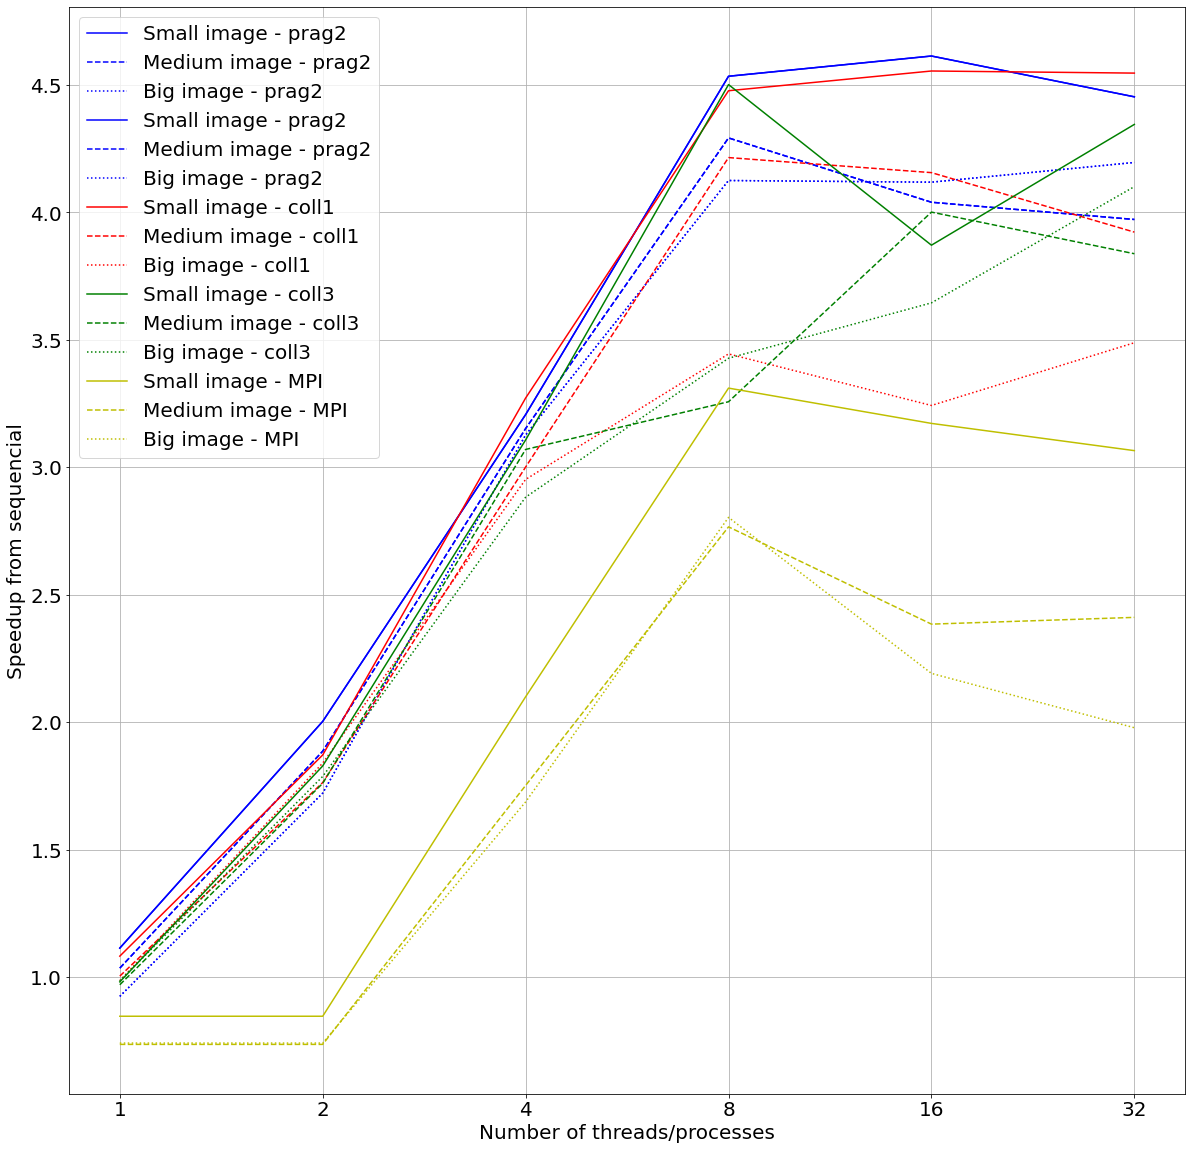

In [143]:
#Speedups from sequencial

speedupsSmallPrag = []
speedupsMediumPrag = []
speedupsBigPrag = []

speedupsSmallColl1 = []
speedupsMediumColl1 = []
speedupsBigColl1 = []

speedupsSmallColl3 = []
speedupsMediumColl3 = []
speedupsBigColl3 = []

speedupsSmallMPI = []
speedupsMediumMPI = []
speedupsBigMPI = []



for index in range(len(seq_small)):
    speedupsSmallPrag.append(seq_small[0]/small_Prag2[index])
    speedupsMediumPrag.append(seq_medium[0]/medium_Prag2[index])
    speedupsBigPrag.append(seq_big[0]/big_Prag2[index])
    
    speedupsSmallColl1.append(seq_small[0]/small_coll1[index])
    speedupsMediumColl1.append(seq_medium[0]/medium_coll1[index])
    speedupsBigColl1.append(seq_big[0]/big_coll1[index])
    
    speedupsSmallColl3.append(seq_small[0]/small_coll3[index])
    speedupsMediumColl3.append(seq_medium[0]/medium_coll3[index])
    speedupsBigColl3.append(seq_big[0]/big_coll3[index])
    
    speedupsSmallMPI.append(seq_small[0]/small_mpi[index])
    speedupsMediumMPI.append(seq_medium[0]/medium_mpi[index])
    speedupsBigMPI.append(seq_big[0]/big_mpi[index])
    
x_label = ['1', '2', '4', '8', '16', '32']

plt.figure(figsize=(20,20))
plt.plot(x_label, speedupsSmallPrag, 'b-', label='Small image - prag2')
plt.plot(x_label, speedupsMediumPrag, 'b--', label = 'Medium image - prag2')
plt.plot(x_label, speedupsBigPrag, 'b:', label = 'Big image - prag2')

plt.plot(x_label, speedupsSmallPrag, 'b-', label='Small image - prag2')
plt.plot(x_label, speedupsMediumPrag, 'b--', label='Medium image - prag2')
plt.plot(x_label, speedupsBigPrag, 'b:', label='Big image - prag2')

plt.plot(x_label, speedupsSmallColl1, 'r-', label='Small image - coll1')
plt.plot(x_label, speedupsMediumColl1, 'r--', label='Medium image - coll1')
plt.plot(x_label, speedupsBigColl1, 'r:', label='Big image - coll1')

plt.plot(x_label, speedupsSmallColl3, 'g-', label='Small image - coll3')
plt.plot(x_label, speedupsMediumColl3, 'g--', label='Medium image - coll3')
plt.plot(x_label, speedupsBigColl3, 'g:', label='Big image - coll3')

plt.plot(x_label, speedupsSmallMPI, 'y-', label='Small image - MPI')
plt.plot(x_label, speedupsMediumMPI, 'y--', label='Medium image - MPI')
plt.plot(x_label, speedupsBigMPI, 'y:', label='Big image - MPI')
plt.xlabel("Number of threads/processes")
plt.ylabel("Speedup from sequencial")
plt.grid()
plt.legend()